In [159]:
import jax
jax.__version__
from jax import Array 
from typing import Annotated

Annotated[Array, (None,), float]

typing.Annotated[jax.Array, (None,), <class 'float'>]

In [5]:
# Quick Check to be sure
import os
print(os.getcwd())
import socket
import sys
print(socket.gethostname())
print(os.path.isdir('/scratch/midway3/fsemler'))
EXTRACTED_DIR = "/scratch/midway3/fsemler/monotonic-nn-0.3.5"
sys.path.append(EXTRACTED_DIR)
# Change dir
if '/Code' in os.getcwd():
    os.chdir('/Code/ActualThesisWork')
    pass
else:
    os.chdir('/scratch/midway3/fsemler')
print(os.getcwd())
print(os.listdir(os.getcwd()))

/Code
db30aa633f3c
False
/Code/ActualThesisWork
['CurveFitEntirerLCE.ipynb', 'layer_reimplementation_np.py', 'misc.ipynb', 'MiscPlotting.ipynb', 'reimplementation_verification.ipynb', 'biased_model_full_trained.h5', '__pycache__', 'Train_GCN.ipynb', 'strax_data', 'test_rLCE+MiscComponents.ipynb', 'PMT_calibration.ipynb', 'filtering_data.ipynb', 'Replicate.sync-conflict-20241019-125336-66OAXDZ.ipynb', 'test_rLCE_against_NN.ipynb', 'tpc_structure.ipynb', 'data', 'NotesOnServer', 'models', 'ShenyangSR2_RadialLCE.ipynb', 'MC_AnodeMesh.ipynb', 'Irrelevant', 'layer_definitions.py', 'README.md', 'CurveFit_FirstBiased.ipynb', 'CurveFit_FirstBiased.sync-conflict-20250429-115302-FF7LCQH.ipynb', 'data.npy', 'process_raw_local.ipynb', 'retrieving_data.ipynb', 'Anode_To_Gate.ipynb', 'NewLoss_NN.ipynb', 'layer_reimplementations_jax.py', 'CurveFitLCEJax.ipynb', 'GeoemetricAndGeneralInvestigation.ipynb', 'functions.py', 'OfficialLCEs.ipynb', 'Old', 's2_map.pkl', 'resource_cache', 'targets.npy', 'Bulk_

In [6]:
import sys, os
import numpy as np
sys.path.append(os.getcwd())

from functions import *
# Note some things are dualy defined layer definitions has the up to date
from layer_definitions import *

2025-05-22 08:33:12.774909: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-22 08:33:12.805050: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 08:33:12.805077: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 08:33:12.805820: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 08:33:12.810733: I tensorflow/core/platform/cpu_feature_guar

In [82]:
pmt_pos_top = np.array([[-1.38753e+01, -6.40872e+01],[-2.08129e+01, -6.00818e+01],[-2.77506e+01, -5.60763e+01],[-3.46882e+01, -5.20709e+01],[-4.16259e+01, -4.80654e+01],[-4.85635e+01, -4.40600e+01],[-1.67313e-05, -6.40872e+01],[-6.93766e+00, -6.00818e+01],[-1.38753e+01, -5.60763e+01],[-2.08129e+01, -5.20709e+01],[-2.77506e+01, -4.80654e+01],[-3.46882e+01, -4.40600e+01],[-4.16259e+01, -4.00545e+01],[-4.85635e+01, -3.60491e+01],[-5.55012e+01, -3.20436e+01],[ 1.38753e+01, -6.40872e+01],[ 6.93763e+00, -6.00818e+01],[-1.46399e-05, -5.60763e+01],[-6.93766e+00, -5.20709e+01],[-1.38753e+01, -4.80654e+01],[-2.08129e+01, -4.40600e+01],[-2.77506e+01, -4.00545e+01],[-3.46882e+01, -3.60491e+01],[-4.16259e+01, -3.20436e+01],[-4.85635e+01, -2.80382e+01],[-5.55012e+01, -2.40327e+01],[-6.24388e+01, -2.00273e+01],[ 2.08129e+01, -6.00818e+01],[ 1.38753e+01, -5.60763e+01],[ 6.93763e+00, -5.20709e+01],[-1.25485e-05, -4.80654e+01],[-6.93766e+00, -4.40600e+01],[-1.38753e+01, -4.00545e+01],[-2.08129e+01, -3.60491e+01],[-2.77506e+01, -3.20436e+01],[-3.46882e+01, -2.80382e+01],[-4.16259e+01, -2.40327e+01],[-4.85635e+01, -2.00273e+01],[-5.55012e+01, -1.60218e+01],[-6.24388e+01, -1.20164e+01],[ 2.77506e+01, -5.60763e+01],[ 2.08129e+01, -5.20709e+01],[ 1.38753e+01, -4.80654e+01],[ 6.93763e+00, -4.40600e+01],[-1.04571e-05, -4.00545e+01],[-6.93765e+00, -3.60491e+01],[-1.38753e+01, -3.20436e+01],[-2.08129e+01, -2.80382e+01],[-2.77506e+01, -2.40327e+01],[-3.46882e+01, -2.00273e+01],[-4.16259e+01, -1.60218e+01],[-4.85635e+01, -1.20164e+01],[-5.55012e+01, -8.01092e+00],[-6.24388e+01, -4.00547e+00],[ 3.46882e+01, -5.20709e+01],[ 2.77506e+01, -4.80654e+01],[ 2.08129e+01, -4.40600e+01],[ 1.38753e+01, -4.00545e+01],[ 6.93763e+00, -3.60491e+01],[-8.36565e-06, -3.20436e+01],[-6.93765e+00, -2.80382e+01],[-1.38753e+01, -2.40327e+01],[-2.08129e+01, -2.00273e+01],[-2.77506e+01, -1.60218e+01],[-3.46882e+01, -1.20164e+01],[-4.16259e+01, -8.01091e+00],[-4.85635e+01, -4.00546e+00],[-5.55012e+01, -1.44897e-05],[-6.24388e+01,  4.00544e+00],[ 4.16259e+01, -4.80654e+01],[ 3.46882e+01, -4.40600e+01],[ 2.77506e+01, -4.00545e+01],[ 2.08129e+01, -3.60491e+01],[ 1.38753e+01, -3.20436e+01],[ 6.93764e+00, -2.80382e+01],[-6.27423e-06, -2.40327e+01],[-6.93765e+00, -2.00273e+01],[-1.38753e+01, -1.60218e+01],[-2.08129e+01, -1.20164e+01],[-2.77506e+01, -8.01091e+00],[-3.46882e+01, -4.00546e+00],[-4.16259e+01, -1.08673e-05],[-4.85635e+01,  4.00544e+00],[-5.55011e+01,  8.01089e+00],[-6.24388e+01,  1.20163e+01],[ 4.85635e+01, -4.40600e+01],[ 4.16259e+01, -4.00545e+01],[ 3.46882e+01, -3.60491e+01],[ 2.77506e+01, -3.20436e+01],[ 2.08129e+01, -2.80382e+01],[ 1.38753e+01, -2.40327e+01],[ 6.93764e+00, -2.00273e+01],[-4.18282e-06, -1.60218e+01],[-6.93765e+00, -1.20164e+01],[-1.38753e+01, -8.01091e+00],[-2.08129e+01, -4.00546e+00],[-2.77506e+01, -7.24486e-06],[-3.46882e+01,  4.00544e+00],[-4.16259e+01,  8.01089e+00],[-4.85635e+01,  1.20163e+01],[-5.55011e+01,  1.60218e+01],[-6.24388e+01,  2.00272e+01],[ 4.85635e+01, -3.60491e+01],[ 4.16259e+01, -3.20436e+01],[ 3.46882e+01, -2.80382e+01],[ 2.77506e+01, -2.40327e+01],[ 2.08129e+01, -2.00273e+01],[ 1.38753e+01, -1.60218e+01],[ 6.93764e+00, -1.20164e+01],[-2.09141e-06, -8.01090e+00],[-6.93764e+00, -4.00545e+00],[-1.38753e+01, -3.62243e-06],[-2.08129e+01,  4.00545e+00],[-2.77506e+01,  8.01090e+00],[-3.46882e+01,  1.20163e+01],[-4.16259e+01,  1.60218e+01],[-4.85635e+01,  2.00272e+01],[-5.55011e+01,  2.40327e+01],[ 5.55011e+01, -3.20436e+01],[ 4.85635e+01, -2.80382e+01],[ 4.16259e+01, -2.40327e+01],[ 3.46882e+01, -2.00273e+01],[ 2.77506e+01, -1.60218e+01],[ 2.08129e+01, -1.20163e+01],[ 1.38753e+01, -8.01090e+00],[ 6.93764e+00, -4.00545e+00],[-0.00000e+00,  0.00000e+00],[-6.93764e+00,  4.00545e+00],[-1.38753e+01,  8.01090e+00],[-2.08129e+01,  1.20164e+01],[-2.77506e+01,  1.60218e+01],[-3.46882e+01,  2.00273e+01],[-4.16259e+01,  2.40327e+01],[-4.85635e+01,  2.80382e+01],[-5.55011e+01,  3.20436e+01],[ 5.55011e+01, -2.40327e+01],[ 4.85635e+01, -2.00272e+01],[ 4.16259e+01, -1.60218e+01],[ 3.46882e+01, -1.20163e+01],[ 2.77506e+01, -8.01090e+00],[ 2.08129e+01, -4.00545e+00],[ 1.38753e+01,  3.62243e-06],[ 6.93764e+00,  4.00545e+00],[ 2.09141e-06,  8.01090e+00],[-6.93764e+00,  1.20164e+01],[-1.38753e+01,  1.60218e+01],[-2.08129e+01,  2.00273e+01],[-2.77506e+01,  2.40327e+01],[-3.46882e+01,  2.80382e+01],[-4.16259e+01,  3.20436e+01],[-4.85635e+01,  3.60491e+01],[ 6.24388e+01, -2.00272e+01],[ 5.55011e+01, -1.60218e+01],[ 4.85635e+01, -1.20163e+01],[ 4.16259e+01, -8.01089e+00],[ 3.46882e+01, -4.00544e+00],[ 2.77506e+01,  7.24486e-06],[ 2.08129e+01,  4.00546e+00],[ 1.38753e+01,  8.01091e+00],[ 6.93765e+00,  1.20164e+01],[ 4.18282e-06,  1.60218e+01],[-6.93764e+00,  2.00273e+01],[-1.38753e+01,  2.40327e+01],[-2.08129e+01,  2.80382e+01],[-2.77506e+01,  3.20436e+01],[-3.46882e+01,  3.60491e+01],[-4.16259e+01,  4.00545e+01],[-4.85635e+01,  4.40600e+01],[ 6.24388e+01, -1.20163e+01],[ 5.55011e+01, -8.01089e+00],[ 4.85635e+01, -4.00544e+00],[ 4.16259e+01,  1.08673e-05],[ 3.46882e+01,  4.00546e+00],[ 2.77506e+01,  8.01091e+00],[ 2.08129e+01,  1.20164e+01],[ 1.38753e+01,  1.60218e+01],[ 6.93765e+00,  2.00273e+01],[ 6.27423e-06,  2.40327e+01],[-6.93764e+00,  2.80382e+01],[-1.38753e+01,  3.20436e+01],[-2.08129e+01,  3.60491e+01],[-2.77506e+01,  4.00545e+01],[-3.46882e+01,  4.40600e+01],[-4.16259e+01,  4.80654e+01],[ 6.24388e+01, -4.00544e+00],[ 5.55012e+01,  1.44897e-05],[ 4.85635e+01,  4.00546e+00],[ 4.16259e+01,  8.01091e+00],[ 3.46882e+01,  1.20164e+01],[ 2.77506e+01,  1.60218e+01],[ 2.08129e+01,  2.00273e+01],[ 1.38753e+01,  2.40327e+01],[ 6.93765e+00,  2.80382e+01],[ 8.36565e-06,  3.20436e+01],[-6.93763e+00,  3.60491e+01],[-1.38753e+01,  4.00545e+01],[-2.08129e+01,  4.40600e+01],[-2.77506e+01,  4.80654e+01],[-3.46882e+01,  5.20709e+01],[ 6.24388e+01,  4.00547e+00],[ 5.55012e+01,  8.01092e+00],[ 4.85635e+01,  1.20164e+01],[ 4.16259e+01,  1.60218e+01],[ 3.46882e+01,  2.00273e+01],[ 2.77506e+01,  2.40327e+01],[ 2.08129e+01,  2.80382e+01],[ 1.38753e+01,  3.20436e+01],[ 6.93765e+00,  3.60491e+01],[ 1.04571e-05,  4.00545e+01],[-6.93763e+00,  4.40600e+01],[-1.38753e+01,  4.80654e+01],[-2.08129e+01,  5.20709e+01],[-2.77506e+01,  5.60763e+01],[ 6.24388e+01,  1.20164e+01],[ 5.55012e+01,  1.60218e+01],[ 4.85635e+01,  2.00273e+01],[ 4.16259e+01,  2.40327e+01],[ 3.46882e+01,  2.80382e+01],[ 2.77506e+01,  3.20436e+01],[ 2.08129e+01,  3.60491e+01],[ 1.38753e+01,  4.00545e+01],[ 6.93766e+00,  4.40600e+01],[ 1.25485e-05,  4.80654e+01],[-6.93763e+00,  5.20709e+01],[-1.38753e+01,  5.60763e+01],[-2.08129e+01,  6.00818e+01],[ 6.24388e+01,  2.00273e+01],[ 5.55012e+01,  2.40327e+01],[ 4.85635e+01,  2.80382e+01],[ 4.16259e+01,  3.20436e+01],[ 3.46882e+01,  3.60491e+01],[ 2.77506e+01,  4.00545e+01],[ 2.08129e+01,  4.40600e+01],[ 1.38753e+01,  4.80654e+01],[ 6.93766e+00,  5.20709e+01],[ 1.46399e-05,  5.60763e+01],[-6.93763e+00,  6.00818e+01],[-1.38753e+01,  6.40872e+01],[ 5.55012e+01,  3.20436e+01],[ 4.85635e+01,  3.60491e+01],[ 4.16259e+01,  4.00545e+01],[ 3.46882e+01,  4.40600e+01],[ 2.77506e+01,  4.80654e+01],[ 2.08129e+01,  5.20709e+01],[ 1.38753e+01,  5.60763e+01],[ 6.93766e+00,  6.00818e+01],[ 1.67313e-05,  6.40872e+01],[ 4.85635e+01,  4.40600e+01],[ 4.16259e+01,  4.80654e+01],[ 3.46882e+01,  5.20709e+01],[ 2.77506e+01,  5.60763e+01],[ 2.08129e+01,  6.00818e+01],[ 1.38753e+01,  6.40872e+01]]) 
pmt_pos_top = pmt_pos_top.astype('float32')
#pmt_pos_top = straxen.pmt_positions()[straxen.pmt_positions()['array'] == 'top'].loc[:,['x','y']].to_numpy().astype('float32')
pmt_positions = pmt_pos_top[:,0:2]
not_dead_pmts = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 157, 158, 159, 160, 161, 162, 163, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252]
dead_pmts = [28, 108, 121, 144, 156, 164, 177] #TODO 174 index has to be removed everywhere
missing_dead_og_indx = [174]
missing_dead_not_dead_idx = np.argwhere(np.array(not_dead_pmts) == 174)[0]
n_alive_pmts = len(not_dead_pmts)
n_pmts = len(not_dead_pmts)+len(dead_pmts)
angle_model_path = 'angle_model.keras'
curr_path = os.getcwd()

angle_model_path = 'angle_model.keras'
input_1 = tf.keras.Input(shape=(2,), name='input')
low_res_model_ = GetWallDistPredictive(angle_model=lambda x: x, 
                                          model_path=angle_model_path, 
                                          pmt_positions=pmt_pos_top, 
                                          tpc_r=66.4, 
                                          name='Event_Wall_distance',
                                          mode= 'optimize', 
                                          tol= 1e-1, 
                                          max_iter= 100000,)
low_res_model = tf.keras.Model(inputs=input_1, outputs=low_res_model_(input_1))
input_2 = tf.keras.Input(shape=(2,), name='input')
high_res_model_ = GetWallDistPredictive(angle_model=lambda x: x, 
                                          model_path=angle_model_path, 
                                          pmt_positions=pmt_pos_top, 
                                          tpc_r=66.4, 
                                          name='Event_Wall_distance',
                                          mode= 'optimize', 
                                          tol= 1e-3, 
                                          max_iter= 100000,)
high_res_model = tf.keras.Model(inputs=input_2, outputs=high_res_model_(input_2))



In [83]:
low_res_model.compile(optimizer='adam', loss='mse')
high_res_model.compile(optimizer='adam', loss='mse')

In [84]:
# Random homogeneous points in radius 66.4 
r = 66.4
n_points = 100_000
rsquared = np.random.uniform(0, r**2, n_points)
theta = np.random.uniform(0, 2*np.pi, n_points)
x = np.sqrt(rsquared) * np.cos(theta)
y = np.sqrt(rsquared) * np.sin(theta)
# n_points , 2
points = np.column_stack((x, y))

In [85]:
low_pred = low_res_model.predict(points)
high_pred = high_res_model.predict(points)

3125/3125 [==============================] - 73s 23ms/step


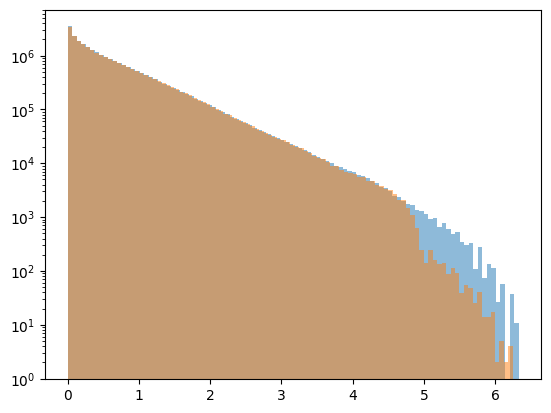

In [86]:
diff = np.abs(high_pred - low_pred)
plt.hist(diff[:,:,0].reshape(-1), bins=100, alpha=0.5, label='Wall Event Distance Error')
plt.hist(diff[:,:,1].reshape(-1), bins=100, alpha=0.5, label='PMT Wall Distance Error')
plt.yscale('log')

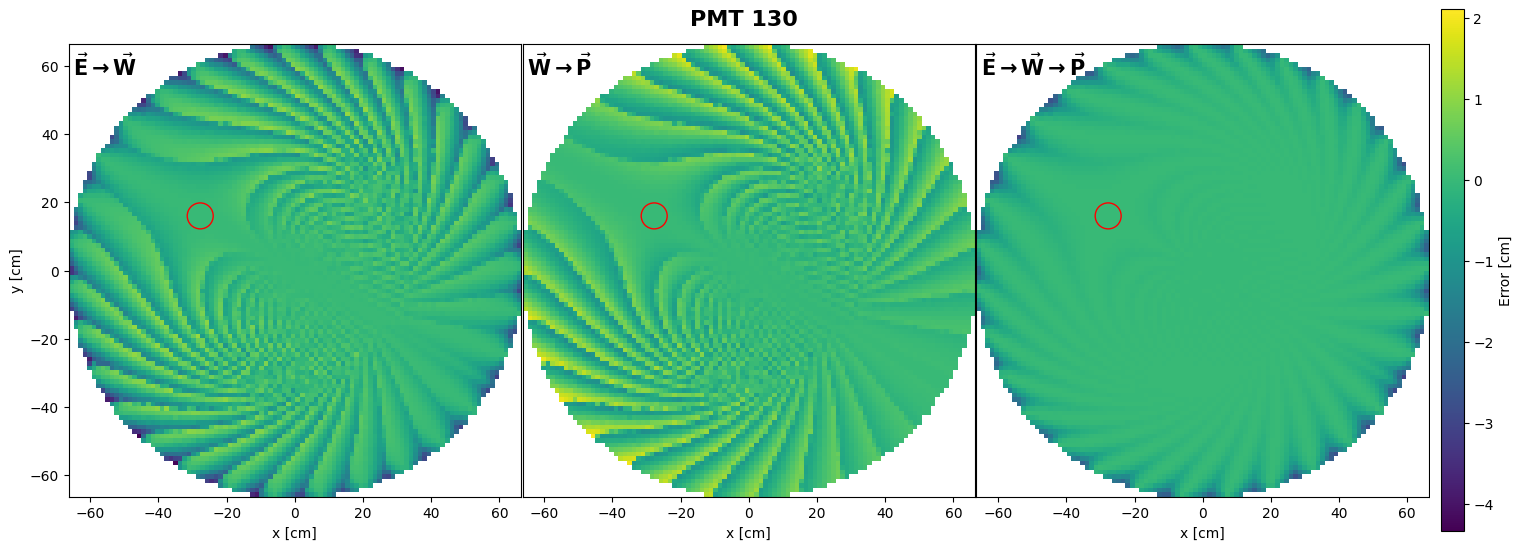

In [150]:
diff = (high_pred - low_pred)

pmt_idx = 130      # PMT / detector to inspect
bins    = 100     # 2-D histogram resolution
cmap    = 'viridis'


# --------------------------------------------------------------------------
# BUILD THE THREE 2-D ERROR MAPS
# --------------------------------------------------------------------------
def map_for_component(z):
    """Return a 2-D binned map for any 1-D data array *z*."""
    stat = binned_statistic_2d(points[:, 0], points[:, 1], z, bins=bins).statistic
    return stat.T                                       # transpose → imshow friendly

maps = [
    map_for_component(diff[:, pmt_idx, 0]),
    map_for_component(diff[:, pmt_idx, 1]),
    map_for_component(diff[:, pmt_idx, 0] + diff[:, pmt_idx, 1]),
]

# robust colour limits (can cope with all-NaN input)
try:
    vmin = np.nanmin(maps)
    vmax = np.nanmax(maps)
    if not np.isfinite(vmin) or not np.isfinite(vmax):
        raise ValueError
except ValueError:       # all values are NaN / inf → fall back on automatic scaling
    vmin = vmax = None

x_min, x_max = points[:, 0].min(), points[:, 0].max()
y_min, y_max = points[:, 1].min(), points[:, 1].max()
# --------------------------------------------------------------------------
# FIGURE: 3 PANELS + 1 SLIM COLOUR-BAR COLUMN
# --------------------------------------------------------------------------
fig, axes = plt.subplots(
    1, 5, figsize=(18, 6), sharex=False, sharey=False,
    gridspec_kw={'width_ratios': [1, 1, 1, 0.02, 0.05], 'wspace': 0.005, 'top':0.98}
)
# Hide all parts of axes 3
axes[3].get_yaxis().set_visible(False)  # remove y-axis ticks
axes[3].get_xaxis().set_visible(False)  # remove x-axis ticks
# Change right spine width
axes[3].spines['right'].set_linewidth(0.01)
axes[3].spines['top'].set_visible(False)
axes[3].spines['right'].set_visible(False)
axes[3].spines['left'].set_visible(False)
axes[3].spines['bottom'].set_visible(False)
axes[2].spines['right'].set_visible(True)
axes = [ax for i, ax in enumerate(axes) if i != 3]


ims = []
for ax, img in zip(axes[:3], maps):
    im =ax.imshow(
        img, origin='lower', extent=[x_min, x_max, y_min, y_max],
        cmap=cmap, interpolation='nearest', vmin=vmin, vmax=vmax
        )
    ims.append(im)

# in-panel labels (top-left)

for ax, lab in zip(axes[:3], [r'$\mathbf{\vec{E}\to\vec{W}}$', r'$\mathbf{\vec{W}\to\vec{P}}$', r'$\mathbf{\vec{E}\to\vec{W}\to\vec{P}}$']):
    ax.text(0.01, 0.98, lab, transform=ax.transAxes,
            va='top', ha='left', fontweight='bold', fontsize=15)


# axis labels
for ax in axes[:3]:
    ax.set_xlabel('x [cm]')
    # Plot circle
    circle = plt.Circle(pmt_pos_top[pmt_idx], 7.62 / 2, color='red', fill=False)
    ax.add_artist(circle)

axes[0].set_ylabel('y [cm]')

for ax in axes[1:3]:
    ax.get_yaxis().set_visible(False)  # remove y-axis ticks
# shared colour-bar in the 4th axis
fig.colorbar(ims[0], cax=axes[3], label='Error [cm]')


# overall title
fig.suptitle(f'PMT {pmt_idx}', fontsize=16, fontweight='bold')

fig.show()